In [5]:
import os
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [3]:
!pip install tensorflow nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/377.0 MB 32.9 MB/s eta 0:00:12
   ---------------------------------------- 3.0/377.0 MB 31.8 MB/s eta 0:00:12
   ---------------------------------------- 4.5/377.0 MB 32.1 MB/s eta 0:00:12
    --------------------------------------- 6.3/377.0 MB 33.5 MB/s eta 0:00:12
    --------------------------------------- 7.3/377.0 MB 31.0 MB/s eta 0:00:12
    --------------------------------------- 7.9/377.0 MB 28.2 MB/s eta 0:00:14
    --------------------------------------- 8.5/377.0 MB 25.8 MB/s eta 0:00:15
    --------------------------------------- 9.3/377.0 MB 24.8 MB/s eta 0

In [6]:
nltk.download('punkt')
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
df = pd.read_csv("D:\GoogleDownloads\Phishing_data.csv")
print(df.columns)
texts = df['Email_Content'].to_numpy()

Index(['id', 'Email_Subject', 'Email_Content', 'Sending_Date', 'Sending_Time',
       'Day', 'URL_Title', 'Coined.Word', 'Sender_Name', 'Sender_Title',
       'Closing_Remarks', 'Sender_Email', 'Logo', 'To', 'id.1', 'Logo.1',
       'id.2', 'Unnamed: 17', 'id.3', 'Unnamed: 19', 'id.4', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')


In [8]:
df.head()

,id,Email_Subject,Email_Content,Sending_Date,Sending_Time,Day,URL_Title,Coined.Word,Sender_Name,Sender_Title,...,id.1,Logo.1,id.2,Unnamed: 17,id.3,Unnamed: 19,id.4,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,URGENT REQUEST,Are you available ? No calls text only 9513072XXX,1/09/2020,na,na,na,Urgent,Y,Chancellor Berkeley University of California,...,1,na,1,NaN,1,NaN,1,NaN,NaN,NaN
1,1,Quick question,I'm in a meeting and need help getting some Am...,1/09/2020,na,na,na,Quick,Y,"University of California, Berkeley",...,2,na,2,NaN,2,NaN,2,NaN,NaN,NaN
2,1,******Part time home work assistant needed******,Hello RECIPIENT I am urgently seeking for a Cl...,10/19/19,2:22 PM,Sat,na,Job/Needed,Y,*Professor David Card* *Department of Economic...,...,3,na,3,NaN,3,NaN,3,NaN,NaN,NaN
3,1,Ê vendor payment,Are you around? I need to pay a vendor with th...,12/27/18,na,na,na,"gift card, meeting",Y,"University of California, Berkeley",...,4,na,4,NaN,4,NaN,4,NaN,NaN,NaN
4,1,Quick question,I'm in a meeting and need help getting some Am...,12/27/18,na,na,na,shared,Y,"University of California, Berkeley",...,5,na,5,NaN,5,NaN,5,NaN,NaN,NaN


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiments(texts):
    sia = SentimentIntensityAnalyzer()
    sentiments = []
    for text in texts:
        sentiment = sia.polarity_scores(text)
        sentiments.append(sentiment)
    return sentiments

sentiments = analyze_sentiments(texts)

def analyze_emotions(sentiments):
    df = pd.DataFrame(sentiments)
    df['emotion'] = df.apply(lambda row: 'positive' if row['compound'] > 0 else ('negative' if row['compound'] < 0 else 'neutral'), axis=1)
    emotion_counts = df['emotion'].value_counts()
    return emotion_counts

emotion_counts = analyze_emotions(sentiments)

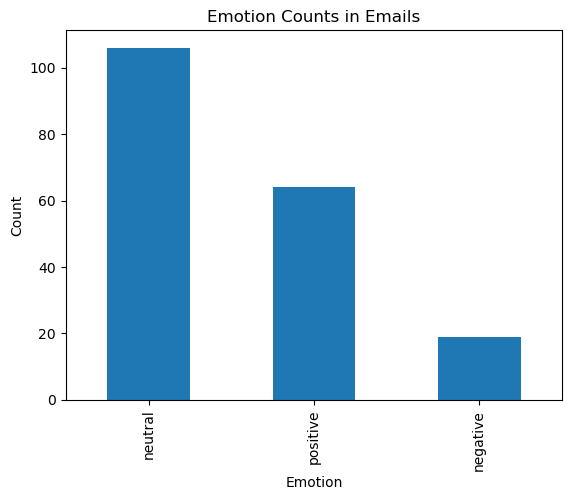

In [21]:
# Plotting the emotion counts
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts in Emails')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

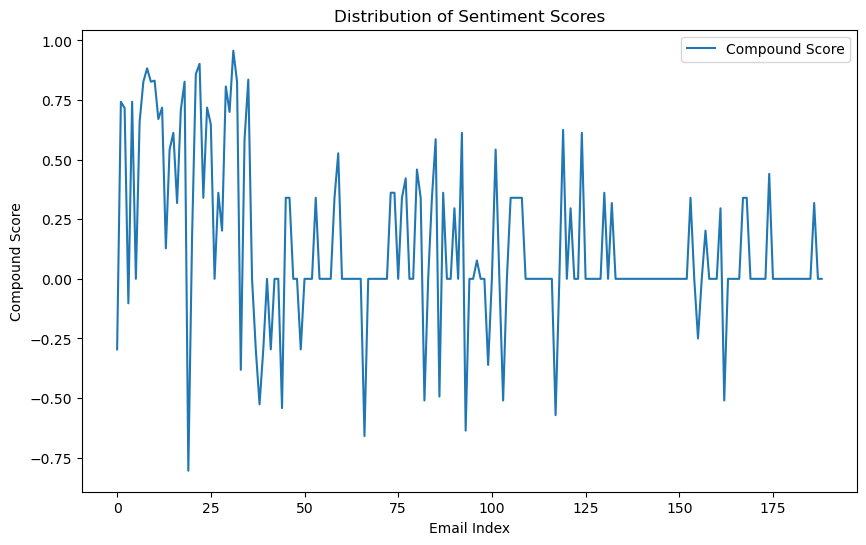

In [22]:
# Assuming 'sentiments' is now correctly populated with actual sentiment scores
# No need to replace 'sentiments' with placeholder data

# Extracting the compound scores for plotting
compound_scores = [sentiment['compound'] for sentiment in sentiments]

# Creating a line plot of the compound scores
plt.figure(figsize=(10, 6))
plt.plot(compound_scores, label='Compound Score')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Email Index')
plt.ylabel('Compound Score')
plt.legend()
plt.show()